## The following code is used for finding Pair ID for (UNI/WETH) pair from Uniswap V2

In [284]:
#Reference
#https://thegraph.com/explorer/subgraph/uniswap/uniswap-v2?query=Example%20query
#https://messari.io/article/retrieving-uniswap-trades-using-the-graph
#https://towardsdatascience.com/graphql-walkthrough-how-to-query-crypto-with-uniswap-defi-e0cbe2035290
#https://k3no.medium.com/how-to-query-in-graphql-6ebb3f7085dc
#https://uniswap.org/docs/v2/API/entities/#swap

import time 
from gql import gql, Client
from gql.transport.requests import RequestsHTTPTransport
sample_transport=RequestsHTTPTransport(url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2') 
client = Client(transport=sample_transport) 
token0_sym=[]
token1_sym=[]
Id=[]
sym0=[]
sym1=[]
tok0='UNI'
tok1='WETH'
for index in range(0,6000,1000):
    str1 = '''query {
       pairs(first: 1000, skip:'''+str(index)+''') {
         id
         token0{
          symbol
        }
        token1{
          symbol
        }

     }
    }'''

    query = gql(str1)
    response = client.execute(query) 
    #time.sleep(1)
    pair=response['pairs']
    for i in range(len(pair)):
    #print(len(response))
        p=pair[i]
        token0=p['token0']
        #print(token0)
        token1=p['token1']
        sym0=token0['symbol']
        sym1=token1['symbol']
        i=p['id']
        if (sym0==tok0 or sym0==tok0.lower()) and (sym1==tok1 or sym1==tok1.lower()):
            Id.append(i)
print("Pair ID for ("+tok0+"/"+tok1+") :",Id)


Pair ID for (UNI/WETH) : ['0x17ed679d5283ce525e2f00aee58d030e16526e8a']


### Only 1 Pair ID is found for the (UNI/WETH) pair, the below code can be modified  by run over the loop if multiple pair id exists.

In [272]:
# Using Pair ID for (UNI/WETH) : ['0x17ed679d5283ce525e2f00aee58d030e16526e8a'] retrieve from the above code block

sample_transport=RequestsHTTPTransport(
url='https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v2'
) 
client = Client(
transport=sample_transport
) 
query = gql('''
query {

 swaps(where: { pair: "0x17ed679d5283ce525e2f00aee58d030e16526e8a" }) {
 id
 timestamp
  pair
  {
    token0{
      id
      symbol
      name
      totalLiquidity
    }
  
    token1
    {
      id
      symbol
      name
      totalLiquidity
    }
   
    untrackedVolumeUSD
  }
   amount0In
   amount0Out
   amount1In
   amount1Out
   amountUSD
 }
}''')
response = client.execute(query)
print(response)

{'swaps': [{'amount0In': '0', 'amount0Out': '73831.005998587340778981', 'amount1In': '0.4', 'amount1Out': '0', 'amountUSD': '162.7961755491125052230433307804164', 'id': '0x063f98ea8429a7b2d1b9ecf64646ef433b52916b2d00cfdbf153d26bf94523de-0', 'pair': {'token0': {'id': '0xada893dd645da0f356369bed0a130326ab50ade6', 'name': 'uniswap', 'symbol': 'uni', 'totalLiquidity': '0.000000000000423554'}, 'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'name': 'Wrapped Ether', 'symbol': 'WETH', 'totalLiquidity': '744669.692145914205967117'}, 'untrackedVolumeUSD': '797.0442364617227816646338476463585'}, 'timestamp': '1596788978'}, {'amount0In': '90661.089388014913158134', 'amount0Out': '0', 'amount1In': '0', 'amount1Out': '0.497275334229760954', 'amountUSD': '185.7136729099704185930886438933279', 'id': '0x3c593ec110f1ee24defa7d1bec5bd3ef93164ab89e58e1aa251762502e775fdd-0', 'pair': {'token0': {'id': '0xada893dd645da0f356369bed0a130326ab50ade6', 'name': 'uniswap', 'symbol': 'uni', 'totalLiq

In [275]:
swap=response['swaps']
#p=response['pair']
print(swap[0])
print(len(swap))
l=swap[0]
print(l['pair'])

{'amount0In': '0', 'amount0Out': '73831.005998587340778981', 'amount1In': '0.4', 'amount1Out': '0', 'amountUSD': '162.7961755491125052230433307804164', 'id': '0x063f98ea8429a7b2d1b9ecf64646ef433b52916b2d00cfdbf153d26bf94523de-0', 'pair': {'token0': {'id': '0xada893dd645da0f356369bed0a130326ab50ade6', 'name': 'uniswap', 'symbol': 'uni', 'totalLiquidity': '0.000000000000423554'}, 'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'name': 'Wrapped Ether', 'symbol': 'WETH', 'totalLiquidity': '744669.692145914205967117'}, 'untrackedVolumeUSD': '797.0442364617227816646338476463585'}, 'timestamp': '1596788978'}
5
{'token0': {'id': '0xada893dd645da0f356369bed0a130326ab50ade6', 'name': 'uniswap', 'symbol': 'uni', 'totalLiquidity': '0.000000000000423554'}, 'token1': {'id': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2', 'name': 'Wrapped Ether', 'symbol': 'WETH', 'totalLiquidity': '744669.692145914205967117'}, 'untrackedVolumeUSD': '797.0442364617227816646338476463585'}


In [276]:
import pandas as pd
import numpy as np
from decimal import Decimal  
t0_id=[]
t1_id=[]
timestamp=[]
volumeUSD=[]
token0l=[]
token1l=[]
side=[]
BaseQ=[]
QuoteQ=[]
symbol=[]
for i in range(len(swap)):
    eth=swap[i]
    pair=eth['pair']
    token0= pair['token0']
    token1= pair['token1']
    t0id= token0['id']
    t1id= token1['id']
    ts= eth['timestamp']
    t0_id.append(t0id)
    t1_id.append(t1id)
    timestamp.append(ts)
    
    volume=pair['untrackedVolumeUSD']
    volumeUSD.append(volume)
    liquid0= token0['totalLiquidity']
    liquid1= token1['totalLiquidity']
    token0l.append(liquid0)
    token1l.append(liquid1)
    
    symbol0=token0['symbol']
    symbol1=token1['symbol']
    sym=(symbol0+'/'+symbol1)
    symbol.append(sym)
    
    
    amount0In= Decimal(eth['amount0In'])   #token0 Sold
    amount0Out= Decimal(eth['amount0Out']) #token0 Recieved
    amount1In= Decimal(eth['amount1In'])   #token1 Sold
    amount1Out= Decimal(eth['amount1Out']) #token1 Received
    if (amount0In==0):                     #if token0In has no transaction that means token1Out has no transaction which means it Buy
        sd='Buy'
    else:                                  #if token1In has no transaction that means token0Out has no transaction which means it Sell
        sd='Sell'
    side.append(sd)
        
    if amount0In==0:
        BaseQCT= amount0Out
        QuoteQCT = amount1In
    else:
        BaseQCT= amount1Out
        QuoteQCT = amount0In
        
    BaseQ.append(BaseQCT)
    QuoteQ.append(QuoteQCT)
    #print(BaseQCT,QuoteQCT)
    #print(amount0In)
#print(symbol)


In [277]:
mydict={}
mydict['Timestamp'] = timestamp
mydict['Symbol']=symbol
mydict['Base Currency Quantity Traded'] = BaseQ
mydict['Quote Currency Quantity Traded'] = QuoteQ
mydict['Side'] = side
mydict['token0_Liquidity'] = token0l
mydict['toke1_Liquidity'] = token1l
mydict['Volume in USD'] = volumeUSD
mydict['token0_Id'] = t0_id
mydict['tone1_id'] = t1_id

df=pd.DataFrame(mydict)

In [278]:
df

,Timestamp,Symbol,Base Currency Quantity Traded,Quote Currency Quantity Traded,Side,token0_Liquidity,toke1_Liquidity,Volume in USD,token0_Id,tone1_id
0,1596788978,uni/WETH,73831.005998587340778981,0.4,Buy,0.000000000000423554,744669.692145914205967117,797.0442364617227816646338476463585,0xada893dd645da0f356369bed0a130326ab50ade6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
1,1596787715,uni/WETH,0.497275334229760954,90661.089388014913158134,Sell,0.000000000000423554,744669.692145914205967117,797.0442364617227816646338476463585,0xada893dd645da0f356369bed0a130326ab50ade6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
2,1596800185,uni/WETH,0.428032285962199179,73831.005998587340778981,Sell,0.000000000000423554,744669.692145914205967117,797.0442364617227816646338476463585,0xada893dd645da0f356369bed0a130326ab50ade6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
3,1596787712,uni/WETH,90661.089388014913158134,0.5,Buy,0.000000000000423554,744669.692145914205967117,797.0442364617227816646338476463585,0xada893dd645da0f356369bed0a130326ab50ade6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
4,1596791722,uni/WETH,33539.513094696945388003,0.2,Buy,0.000000000000423554,744669.692145914205967117,797.0442364617227816646338476463585,0xada893dd645da0f356369bed0a130326ab50ade6,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2


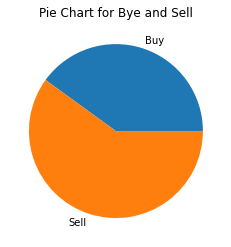

In [303]:
import matplotlib.pyplot as plt
s= list(df['Side'])
by=s.count('Buy')
sl=s.count('Sell')
sidecat=['Buy','Sell']
side=[sl,by]
        
plt.pie(side,labels=sidecat)
plt.title("Pie Chart for Bye and Sell")
plt.show()

# OBSERVATION

### - When Token0IN >0,Token 0Out=0 and Token1IN=0, Token1Out>0 it is SELL
### - When Token0IN =0,Token 0Out>0 and Token1IN>0, Token1Out=0 it is BUY
### - Currency Quantity of WETH is much more than the Currency Quantity of UNI